In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression

In [2]:
X, y = make_regression(n_samples=10000, n_features=20, n_informative=20, noise=10, random_state=1)

u = np.mean(X, axis=0)
std = np.std(X, axis=0)
X = (X-u)/std

In [3]:
ones = np.ones((X.shape[0], 1))
print(X.shape)
print(y.shape)

(10000, 20)
(10000,)


In [4]:
def hypothesis(X, theta):
    return np.dot(X, theta)

def error(X, y, theta):
    e = 0.0
    n = X.shape[0]
    y_ = hypothesis(X, theta)
    e = np.sum((y-y_)**2)
    return e/n

def gradient(X, y, theta):
   y_ = hypothesis(X, theta)
   grad = np.dot(X.T, (y_ - y))
   m = X.shape[0]
   return grad/m
# Batch GradDesc
def gradDesc(X, y, learning_rate = 0.01, max_iters = 300):
    n = X.shape[1]
    theta = np.zeros((n, ))
    error_list = []

    for i in range(max_iters):
        e = error(X, y, theta)
        error_list.append(e)

        grad = gradient(X, y, theta)
        theta = theta - learning_rate*grad
    return theta, error_list

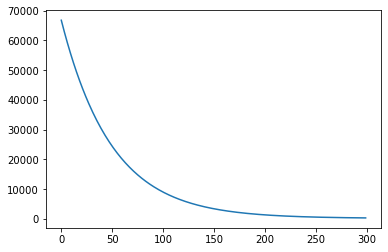

In [5]:
theta, error_list = gradDesc(X, y)

plt.figure()
plt.plot(np.arange(len(error_list)), error_list)
plt.show()

In [14]:
def batch_grad_desc(X, y, batch_size = 200, learning_rate = 0.01, max_iters = 10):
    n = X.shape[1]
    theta = np.zeros((n, ))
    error_list = []
    data = np.hstack((X, y.reshape(-1, 1)))

    for i in range(max_iters):

        np.random.shuffle(data)
        m = data.shape[0]
        total_batches = m//batch_size
        for i in range(total_batches):
            batch_data = data[i*batch_size : (i+1)*batch_size, :]
            x_batch = batch_data[:, :-1]
            y_batch = batch_data[:, -1]

            batch_gradient = gradient(x_batch, y_batch, theta)
            theta = theta - learning_rate*batch_gradient
            e = error(x_batch, y_batch, theta)
            error_list.append(e)

    return theta, error_list

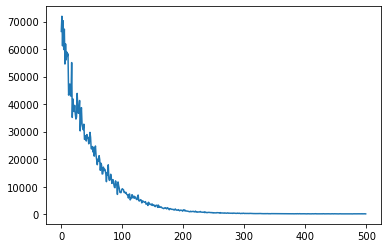

In [15]:
theta, error_list = batch_grad_desc(X, y)

plt.figure()
plt.plot(np.arange(len(error_list)), error_list)
plt.show()